# TODO
* Discriminar datos por tipo de panel (4 tipos*cantidad de calibres en medición)

In [41]:
import pandas as pd #modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import pathlib
from pathlib import Path
from datetime import datetime

In [42]:
directory = Path('./data') #get current work directory
directory.mkdir(exist_ok=True)
matching_files = list(directory.glob("*obj*.xlsx"))  # Busca archivos que contengan 'obj' y tengan extensión .xlsx
print("Archivos encontrados:", matching_files)

Archivos encontrados: [WindowsPath('data/obj_quality_data.xlsx')]


In [43]:
dict_data_pointer={} #dict to store files as dfs
list_wanted_sheets=["data","control"]
for i in matching_files: # Read the Excel file 
    file_path = str(i)  # Update this with the path
    print(file_path)
    for sheet in list_wanted_sheets:
        if sheet=="control":
            rows_start=5
        else:
            rows_start=6
        df = pd.read_excel(file_path,sheet_name=sheet,skiprows=rows_start)
        df_name=file_path.split("obj_")[1].split(".")[0]+"_"+sheet #split str with "obj_" and the  "." char and take the file name
    #row_numbers_nan = df.index[df[date_col].isna()].tolist() # Get the row numbers where 'Fecha' or 'Fecha Paro' is NaN
    #row_numbers = list(set(row_numbers_nan)) # lists of row with nan numbers
    #filtered_df = df.drop(index=row_numbers) # Filter the DataFrame to keep only the rows that are not in row_numbers
        dict_data_pointer[f"{df_name}"]=df #store filtered df in dictionary data pointer
print(list(dict_data_pointer.keys())) #see keys on dictionary to check callability

data\obj_quality_data.xlsx
['quality_data_data', 'quality_data_control']


In [44]:
df_measured=dict_data_pointer['quality_data_data']
df_measured

,ID,Año,Fecha,Hora,Especie Madera,Calibre,Tipo,Decisión,Material denominado FG,Densidad (Kg/m3),...,Columna3,Agarre sup 1,Agarre sup 2,Agarre sup 3,Agarre Sup Prom (N/mm2),Observaciones,Unnamed: 303,Unnamed: 304,Unnamed: 305,Unnamed: 306
0,9958,2024,2024-11-01,22:30:00,"37,56%Pin-62,43%Euc",9.0,LIGHT,OK,NaN,703.547250,...,NaN,0.58,0.51,0.53,0.540000,NaN,NaN,NaN,NaN,NaN
1,9959,2024,2024-11-01,02:00:00,"37,56%Pin-62,43%Euc",9.0,LIGHT,OK,NaN,720.370308,...,NaN,0.52,0.46,0.47,0.483333,NaN,NaN,NaN,NaN,NaN
2,9960,2024,2024-11-01,04:00:00,"37,56%Pin-62,43%Euc",9.0,LIGHT,OK,NaN,708.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9961,2024,2024-11-01,06:20:00,40%Pin-60%Euc,9.0,LIGHT,OK,NaN,712.153428,...,NaN,0.73,0.89,0.69,0.770000,NaN,NaN,NaN,NaN,NaN
4,9962,2024,2024-11-01,09:40:00,40%Pin-60%Euc,9.0,LIGHT,OK,NaN,709.429354,...,NaN,0.77,0.70,0.62,0.696667,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,10110,2024,2024-11-25,07:10:00,"25,98%Pin-74,02%Euc",15.0,LIGHT,OK,NaN,668.395644,...,NaN,1.28,1.37,1.38,1.343333,NaN,NaN,NaN,NaN,NaN
153,10111,2024,2024-11-25,10:40:00,"25,98%Pin-74,02%Euc",15.0,LIGHT,OK,NaN,668.226308,...,NaN,1.22,0.95,0.89,1.020000,NaN,NaN,NaN,NaN,NaN
154,10112,2024,2024-11-25,14:20:00,"16,04%Pin-83,95%Euc",15.0,LIGHT,OK,NaN,656.656090,...,NaN,1.11,1.41,1.27,1.263333,NaN,NaN,NaN,NaN,NaN
155,10113,2024,2024-11-25,16:40:00,"16,04%Pin-83,95%Euc",15.0,LIGHT,OK,NaN,657.936248,...,NaN,1.26,1.34,0.95,1.183333,NaN,NaN,NaN,NaN,NaN


In [45]:
df_control=dict_data_pointer['quality_data_control']
df_control

,Calibre \n( mm ),Tipo,Tablero,DENSIDAD PROMEDIO (Kg/m^3),Hinch 1h (%),SHIVES VALOR MAXIMO,Resina solida/fibra seca (%),Resina diluida %,Parafina sólida/fibra seca %,Solidos (resina) %,...,TRACCION EN321 (Kg/Cm^2),Hinch 321 (%),Hinch Max 24h %,Densidad fibra PLC (kg/m3),Hinch 1087 (%),Calibre Bruto min (mm),Calibre Bruto max (mm),Calibre Bruto Especificación,Peso Probetas (g),Arranque superficial (N/mm2)
0,3,HDF,3HDF,830.0,,15.0,,50.0,,55.5,...,,,35.0,,,NaN,NaN,NaN,,
1,4,HDF,4HDF,800.0,,15.0,10,50.0,0.85,55.5,...,,,25.0,30,,4.3,4.5,4.4,35.2,0.5
2,9,Light,9Light,680.0,,15.0,10.5,50.0,0.85,55.5,...,,,18.0,30,,9.7,10.0,9.8,66.6,0.5
3,12,Light,12Light,640.0,,15.0,10.8,50.0,0.85,55.5,...,,,16.0,30,,12.8,13.1,12.9,82.6,0.6
4,15,Light,15Light,640.0,,15.0,10.8,50.0,0.8,55.5,...,,,14.0,30,,15.9,16.2,16.0,102.4,0.8
5,18,Light,18Light,630.0,,15.0,10.8,50.0,0.8,55.5,...,,,12.0,30,,19.1,19.3,19.2,119.7,0.8
6,25,Light,25Light,630.0,,15.0,11.4,50.0,0.75,55.5,...,,,10.0,30,,26.8,27.2,27.0,170.1,0.8
7,30,Light,30Light,630.0,,15.0,11.4,50.0,0.75,55.5,...,,,10.0,30,,32.3,32.7,32.5,204.8,0.8
8,5.5,STD,"5,5STD",750.0,,15.0,10.5,50.0,0.85,55.5,...,,,25.0,30,,5.8,6.0,5.9,45,0.5
9,12,LIGHT,12Light,720.0,,15.0,8.74,50.0,0.85,55.5,...,,,12.0,30,,12.8,13.1,12.9,93.6,0.6


# Plot measured variables and control variables
* op1: lines

In [47]:
list_measured_cols=["% resina sólida/fibra seca","Tracción interna (kg/cm2)","Peso manta (kg/m2)",
                    "Velocidad línea (mm/s)","% humedad","% hinchamiento 24 h ",
                   "% Parafina sólida/fibra seca2"] #"Calibre",
df_measured.loc[:,["Fecha",list_measured_cols[-1]]]

,Fecha,% Parafina sólida/fibra seca2
0,2024-11-01,0.83
1,2024-11-01,0.83
2,2024-11-01,0.83
3,2024-11-01,0.83
4,2024-11-01,0.83
...,...,...
152,2024-11-25,0.85
153,2024-11-25,0.85
154,2024-11-25,0.85
155,2024-11-25,0.85


In [48]:
df_measured["Fecha"].unique()

<DatetimeArray>
['2024-11-01 00:00:00', '2024-11-02 00:00:00', '2024-11-05 00:00:00',
 '2024-11-06 00:00:00', '2024-11-07 00:00:00', '2024-11-08 00:00:00',
 '2024-11-09 00:00:00', '2024-11-10 00:00:00', '2024-11-11 00:00:00',
 '2024-11-12 00:00:00', '2024-11-13 00:00:00', '2024-11-14 00:00:00',
 '2024-11-15 00:00:00', '2024-11-16 00:00:00', '2024-11-17 00:00:00',
 '2024-11-18 00:00:00', '2024-11-19 00:00:00', '2024-11-20 00:00:00',
 '2024-11-21 00:00:00', '2024-11-22 00:00:00', '2024-11-23 00:00:00',
 '2024-11-24 00:00:00', '2024-11-25 00:00:00']
Length: 23, dtype: datetime64[ns]

In [49]:
df_measured["Fecha"]=df_measured["Fecha"].astype("str")
dates=[date for date in df_measured["Fecha"].unique()]
dates

['2024-11-01',
 '2024-11-02',
 '2024-11-05',
 '2024-11-06',
 '2024-11-07',
 '2024-11-08',
 '2024-11-09',
 '2024-11-10',
 '2024-11-11',
 '2024-11-12',
 '2024-11-13',
 '2024-11-14',
 '2024-11-15',
 '2024-11-16',
 '2024-11-17',
 '2024-11-18',
 '2024-11-19',
 '2024-11-20',
 '2024-11-21',
 '2024-11-22',
 '2024-11-23',
 '2024-11-24',
 '2024-11-25']

In [50]:
len(list_measured_cols)

7

In [134]:
list_control_cols=["Calibre \n( mm )","Resina solida/fibra seca (%)","Parafina sólida/fibra seca %","Peso manta Promedio (kg/m2)",
                   "Peso manta (kg/m2)","Vel. Linea Mínimo  (mm/s)","TRACCION MINIMA  (Kg/cm^2)"]
df_control.loc[:,[list_control_cols[0],list_control_cols[-1],"Tipo"]]

,Calibre \n( mm ),TRACCION MINIMA (Kg/cm^2),Tipo
0,3,6.6,HDF
1,4,8.0,HDF
2,9,5.0,Light
3,12,5.0,Light
4,15,5.0,Light
5,18,4.5,Light
6,25,4.5,Light
7,30,4.5,Light
8,5.5,7.0,STD
9,12,6.0,LIGHT


In [52]:
col_matches={0:1,1:-1,2:4,3:5,}
dict_measured_control_matches={list_measured_cols[key]:list_control_cols[value] for (key,value) in col_matches.items() }
dict_measured_control_matches

{'% resina sólida/fibra seca': 'Resina solida/fibra seca (%)',
 'Tracción interna (kg/cm2)': 'TRACCION MINIMA  (Kg/cm^2)',
 'Peso manta (kg/m2)': 'Peso manta (kg/m2)',
 'Velocidad línea (mm/s)': 'Vel. Linea Mínimo  (mm/s)'}

In [53]:
calibres_measured=[calibre for calibre in df_measured["Calibre"].unique()]
calibres_measured

[9.0, 12.0, 15.0, 18.0, 4.0, 5.5]

In [54]:
type_caliber_measured=[type for type in df_measured["Tipo"].unique()]
type_caliber_measured

['LIGHT', 'RH', 'STD', 'HDF']

# TODO
* complete getting of control values for respective data and caliber

In [56]:
df_control.loc[(df_control[list_control_cols[0]]==calibres_measured[0] ) & (df_control["Tipo"]=="HDF" ) ]

,Calibre \n( mm ),Tipo,Tablero,DENSIDAD PROMEDIO (Kg/m^3),Hinch 1h (%),SHIVES VALOR MAXIMO,Resina solida/fibra seca (%),Resina diluida %,Parafina sólida/fibra seca %,Solidos (resina) %,...,TRACCION EN321 (Kg/Cm^2),Hinch 321 (%),Hinch Max 24h %,Densidad fibra PLC (kg/m3),Hinch 1087 (%),Calibre Bruto min (mm),Calibre Bruto max (mm),Calibre Bruto Especificación,Peso Probetas (g),Arranque superficial (N/mm2)


In [57]:
df_measured_current_calibre=df_measured[df_measured["Calibre"]==calibres_measured[0]]
df_measured_current_calibre

,ID,Año,Fecha,Hora,Especie Madera,Calibre,Tipo,Decisión,Material denominado FG,Densidad (Kg/m3),...,Columna3,Agarre sup 1,Agarre sup 2,Agarre sup 3,Agarre Sup Prom (N/mm2),Observaciones,Unnamed: 303,Unnamed: 304,Unnamed: 305,Unnamed: 306
0,9958,2024,2024-11-01,22:30:00,"37,56%Pin-62,43%Euc",9.0,LIGHT,OK,NaN,703.547250,...,NaN,0.58,0.51,0.53,0.540000,NaN,NaN,NaN,NaN,NaN
1,9959,2024,2024-11-01,02:00:00,"37,56%Pin-62,43%Euc",9.0,LIGHT,OK,NaN,720.370308,...,NaN,0.52,0.46,0.47,0.483333,NaN,NaN,NaN,NaN,NaN
2,9960,2024,2024-11-01,04:00:00,"37,56%Pin-62,43%Euc",9.0,LIGHT,OK,NaN,708.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9961,2024,2024-11-01,06:20:00,40%Pin-60%Euc,9.0,LIGHT,OK,NaN,712.153428,...,NaN,0.73,0.89,0.69,0.770000,NaN,NaN,NaN,NaN,NaN
4,9962,2024,2024-11-01,09:40:00,40%Pin-60%Euc,9.0,LIGHT,OK,NaN,709.429354,...,NaN,0.77,0.70,0.62,0.696667,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,10100,2024,2024-11-24,02:00:00,70%pin - 30%Euc,9.0,LIGHT,OK,NaN,710.235645,...,NaN,0.53,0.65,0.59,0.590000,NaN,NaN,NaN,NaN,NaN
143,10101,2024,2024-11-24,04:00:00,70%pin - 30%Euc,9.0,LIGHT,OK,NaN,690.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,10102,2024,2024-11-24,06:50:00,"28,88%Pin-71,11%Euc",9.0,LIGHT,OK,NaN,693.969708,...,NaN,0.64,0.58,0.78,0.666667,NaN,NaN,NaN,NaN,NaN
145,10103,2024,2024-11-24,10:20:00,"28,88%Pin-71,11%Euc",9.0,LIGHT,OK,NaN,703.704696,...,NaN,0.79,0.85,0.81,0.816667,NaN,NaN,NaN,NaN,NaN


In [58]:
current_data=df_measured_current_calibre.loc[:,["Fecha",list_measured_cols[0]]]
current_data

,Fecha,% resina sólida/fibra seca
0,2024-11-01,10.2
1,2024-11-01,10.2
2,2024-11-01,10.2
3,2024-11-01,10.2
4,2024-11-01,10.2
...,...,...
142,2024-11-24,10.2
143,2024-11-24,10.2
144,2024-11-24,10.0
145,2024-11-24,10.2


# Plotting
## TODO
* plot the control lines

In [117]:
current_date=datetime.today()
current_date=current_date.date()
current_date.day

9

In [119]:
path=r'./imgs_reports_daily/qlty_deviations_plots/month_{}/day_{}/'.format(11,26)
path

'./imgs_reports_daily/qlty_deviations_plots/month_11/day_26/'

In [121]:
directory = Path(path) #get current work directory
directory.mkdir(exist_ok=True)

In [225]:
test=df_control.loc[ (df_control[list_control_cols[0]]==calibres_measured[0])&(df_control[type_mdf_col]==type_caliber_measured[0]) ]
test

,Calibre \n( mm ),Tipo,Tablero,DENSIDAD PROMEDIO (Kg/m^3),Hinch 1h (%),SHIVES VALOR MAXIMO,Resina solida/fibra seca (%),Resina diluida %,Parafina sólida/fibra seca %,Solidos (resina) %,...,TRACCION EN321 (Kg/Cm^2),Hinch 321 (%),Hinch Max 24h %,Densidad fibra PLC (kg/m3),Hinch 1087 (%),Calibre Bruto min (mm),Calibre Bruto max (mm),Calibre Bruto Especificación,Peso Probetas (g),Arranque superficial (N/mm2)


LIGHT
9.0
% resina sólida/fibra seca
Tracción interna (kg/cm2)
Peso manta (kg/m2)
Velocidad línea (mm/s)
% humedad
% hinchamiento 24 h 
./imgs_reports_daily/qlty_deviations_plots/month_11/day_26/Paneles_Calibre_9.0_$[mm]$_tipo_LIGHT.png


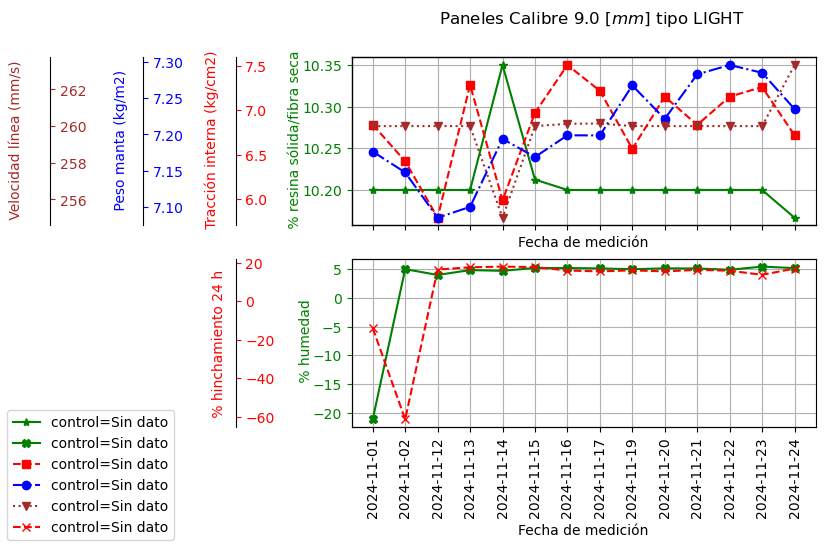

12.0
% resina sólida/fibra seca
Tracción interna (kg/cm2)
Peso manta (kg/m2)
Velocidad línea (mm/s)
% humedad
% hinchamiento 24 h 
./imgs_reports_daily/qlty_deviations_plots/month_11/day_26/Paneles_Calibre_12.0_$[mm]$_tipo_LIGHT.png


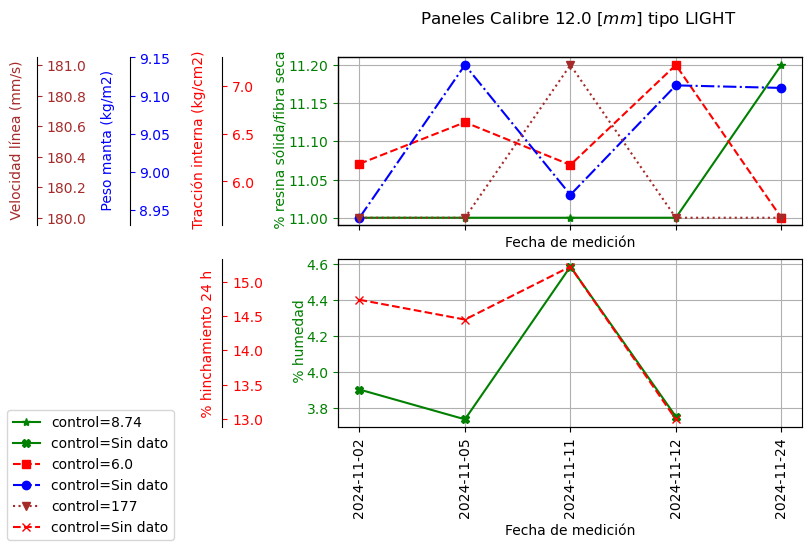

15.0
% resina sólida/fibra seca
Tracción interna (kg/cm2)
Peso manta (kg/m2)
Velocidad línea (mm/s)
% humedad
% hinchamiento 24 h 
./imgs_reports_daily/qlty_deviations_plots/month_11/day_26/Paneles_Calibre_15.0_$[mm]$_tipo_LIGHT.png


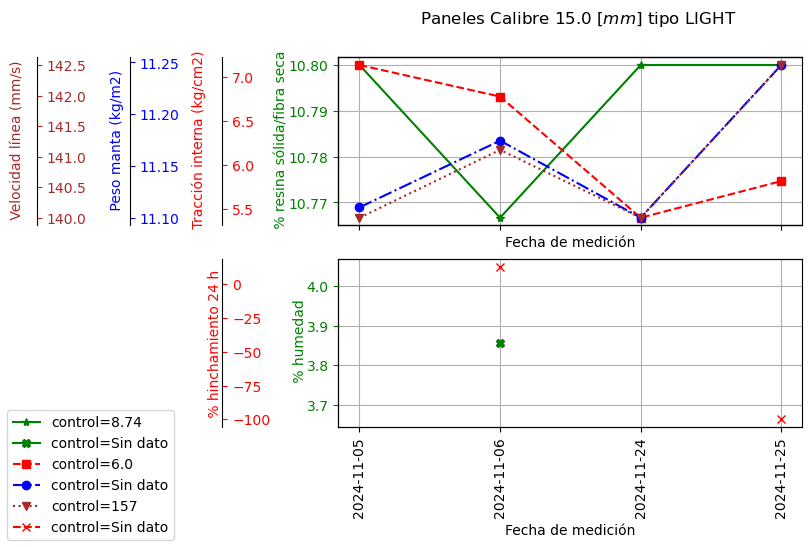

18.0
% resina sólida/fibra seca
Tracción interna (kg/cm2)
Peso manta (kg/m2)
Velocidad línea (mm/s)
% humedad
% hinchamiento 24 h 
./imgs_reports_daily/qlty_deviations_plots/month_11/day_26/Paneles_Calibre_18.0_$[mm]$_tipo_LIGHT.png


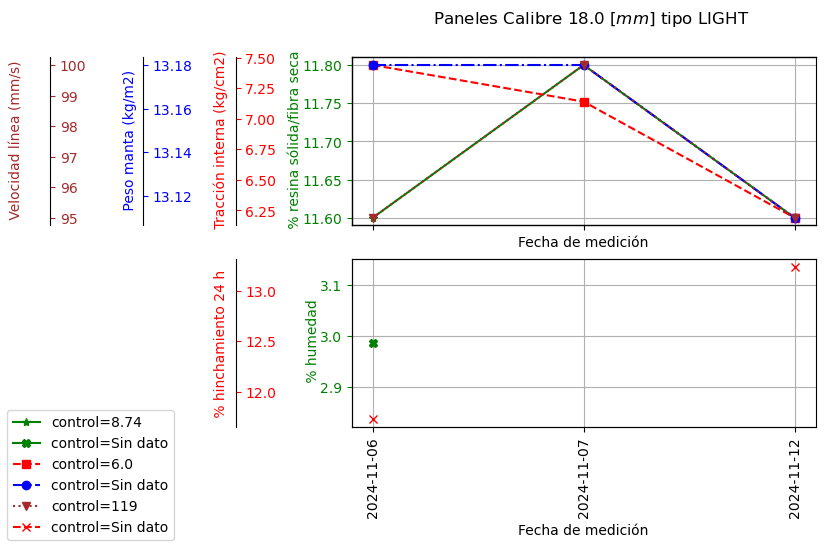

4.0
5.5
RH
9.0
% resina sólida/fibra seca
Tracción interna (kg/cm2)
Peso manta (kg/m2)
Velocidad línea (mm/s)
% humedad
% hinchamiento 24 h 
./imgs_reports_daily/qlty_deviations_plots/month_11/day_26/Paneles_Calibre_9.0_$[mm]$_tipo_RH.png


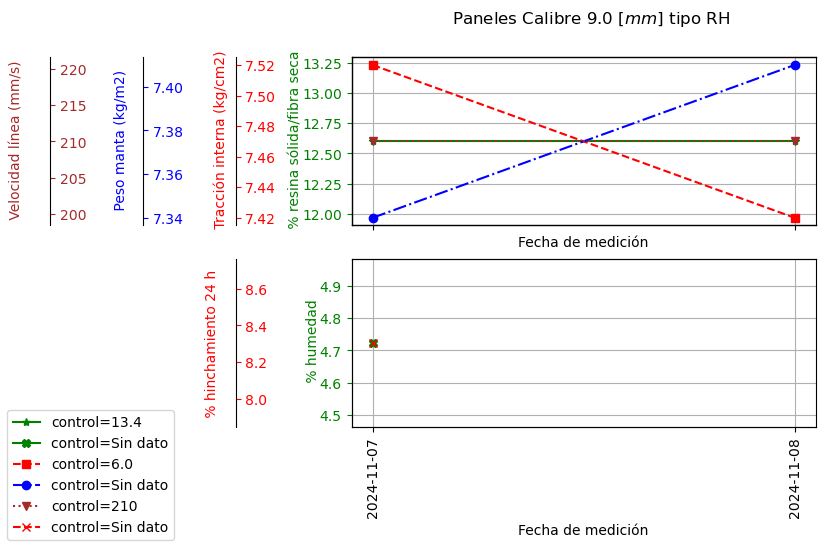

12.0
% resina sólida/fibra seca
Tracción interna (kg/cm2)
Peso manta (kg/m2)
Velocidad línea (mm/s)
% humedad
% hinchamiento 24 h 
./imgs_reports_daily/qlty_deviations_plots/month_11/day_26/Paneles_Calibre_12.0_$[mm]$_tipo_RH.png


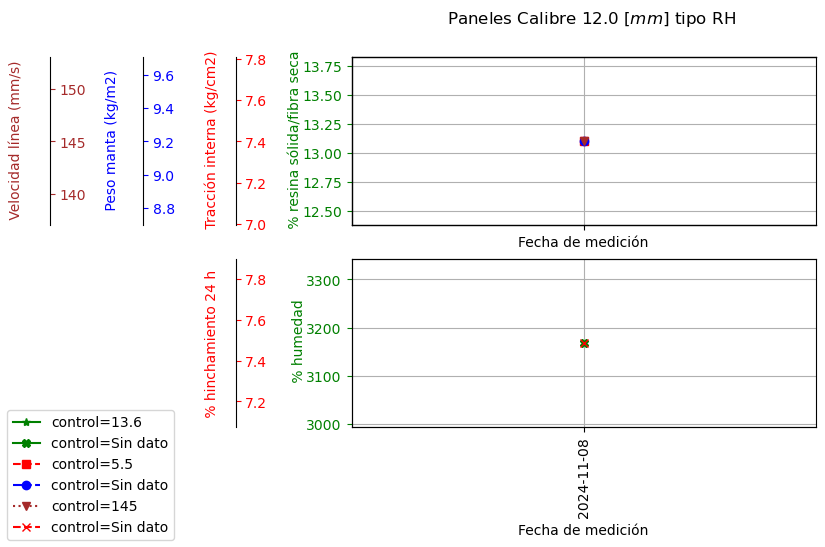

15.0
% resina sólida/fibra seca
Tracción interna (kg/cm2)
Peso manta (kg/m2)
Velocidad línea (mm/s)
% humedad
% hinchamiento 24 h 
./imgs_reports_daily/qlty_deviations_plots/month_11/day_26/Paneles_Calibre_15.0_$[mm]$_tipo_RH.png


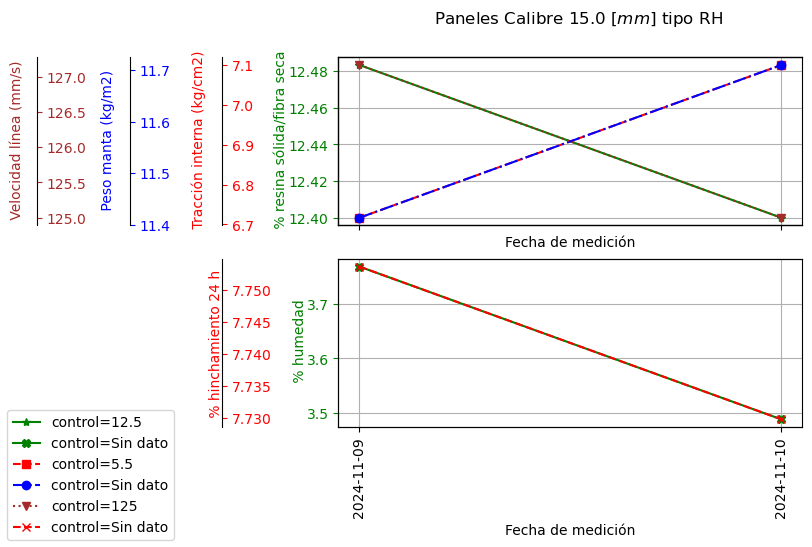

18.0
% resina sólida/fibra seca
Tracción interna (kg/cm2)
Peso manta (kg/m2)
Velocidad línea (mm/s)
% humedad
% hinchamiento 24 h 
./imgs_reports_daily/qlty_deviations_plots/month_11/day_26/Paneles_Calibre_18.0_$[mm]$_tipo_RH.png


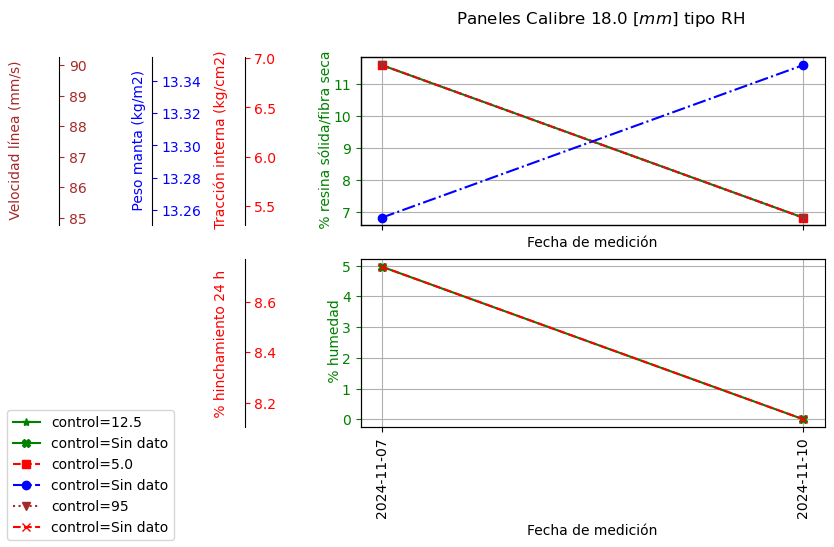

4.0
% resina sólida/fibra seca
Tracción interna (kg/cm2)
Peso manta (kg/m2)
Velocidad línea (mm/s)
% humedad
% hinchamiento 24 h 
./imgs_reports_daily/qlty_deviations_plots/month_11/day_26/Paneles_Calibre_4.0_$[mm]$_tipo_RH.png


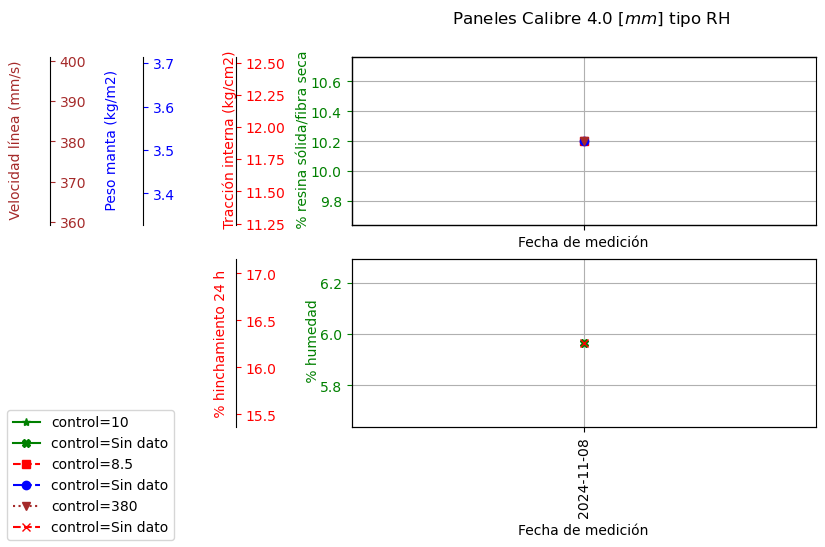

5.5
% resina sólida/fibra seca
Tracción interna (kg/cm2)
Peso manta (kg/m2)
Velocidad línea (mm/s)
% humedad
% hinchamiento 24 h 
./imgs_reports_daily/qlty_deviations_plots/month_11/day_26/Paneles_Calibre_5.5_$[mm]$_tipo_RH.png


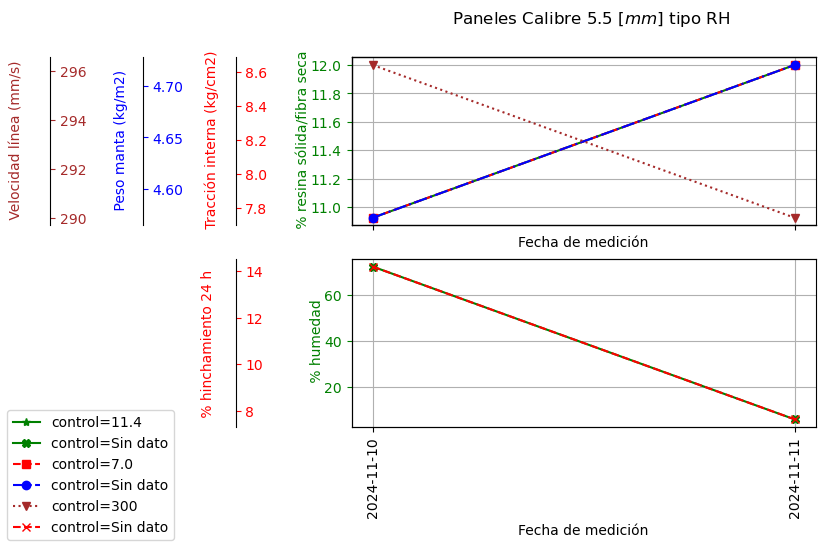

STD
9.0
12.0
15.0
18.0
4.0
5.5
% resina sólida/fibra seca
Tracción interna (kg/cm2)
Peso manta (kg/m2)
Velocidad línea (mm/s)
% humedad
% hinchamiento 24 h 
./imgs_reports_daily/qlty_deviations_plots/month_11/day_26/Paneles_Calibre_5.5_$[mm]$_tipo_STD.png


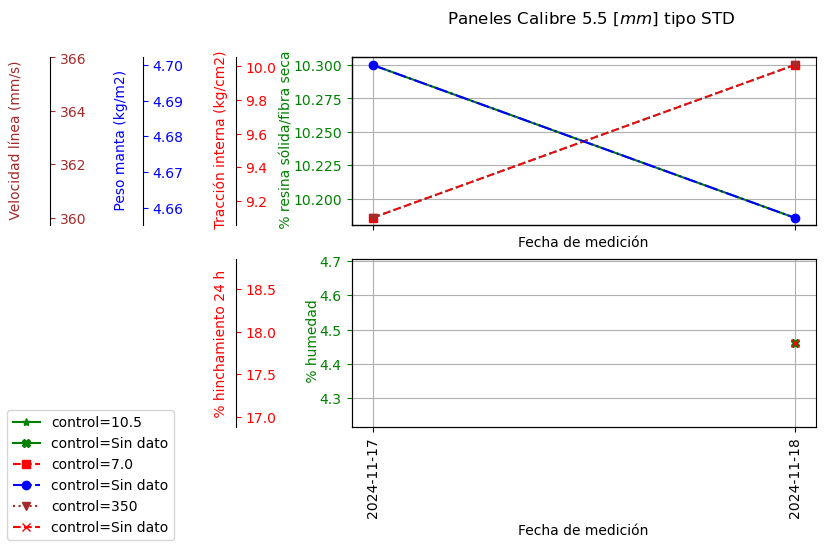

HDF
9.0
12.0
15.0
18.0
4.0
% resina sólida/fibra seca
Tracción interna (kg/cm2)
Peso manta (kg/m2)
Velocidad línea (mm/s)
% humedad
% hinchamiento 24 h 
./imgs_reports_daily/qlty_deviations_plots/month_11/day_26/Paneles_Calibre_4.0_$[mm]$_tipo_HDF.png


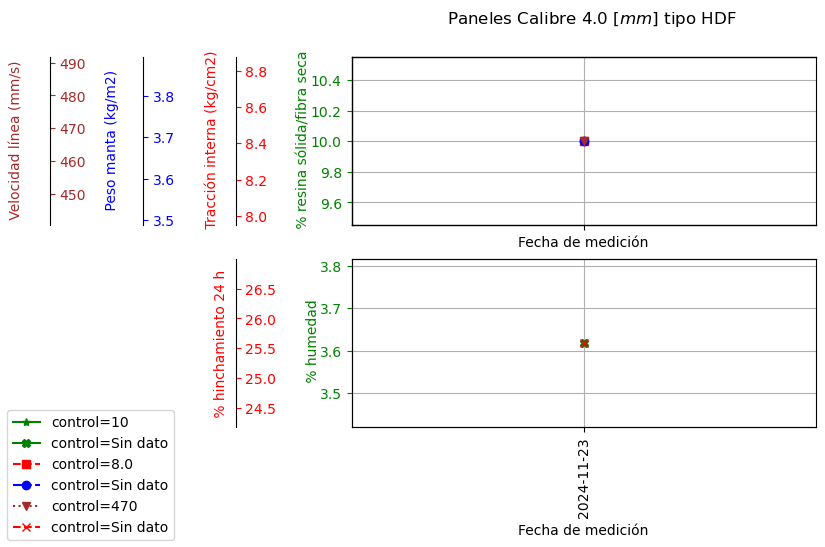

5.5


In [236]:
colors = ('Green', 'Red', 'Blue',"Brown")
date_col="Fecha"
marker_styles=['*','s','o','v','X','x'] #markers to 6 plots
line_styles=['-','--','-.',':','-','--']
calibers_col="Calibre"
type_mdf_col="Tipo"
data_cols_pointers=[[0,4],[4,-1]] #set from where to start calling cols and to where stop the calling
titles_of_imgs=[] #list to store title of data just plotted
for type_mdf in type_caliber_measured:
    print(type_mdf)
    for caliber in calibres_measured:
        print(caliber)
        df_measured_current_calibre=df_measured.loc[ (df_measured[calibers_col]==caliber)&(df_measured[type_mdf_col]==type_mdf) ] #filter measurements for current caliber
        if len(df_measured_current_calibre)<1: #check if querie is not empty
            continue
        intAxNo_plot_number = 0 #counter to select aditional y-axis
        fig, axs = plt.subplots(2,sharex=True) #make 2 plot artists
        axis_counter=0 #counter to see when second axs is selected
        for ax,pointer in zip(axs,data_cols_pointers): #run through axis artists for make figure with 2 plots
            #caliber designation: for future, convert to for loop
            data_cols_start_idx=pointer[0]
            data_cols_end_idx=pointer[-1]
            if axis_counter>0:
                axes = [ax, ax.twinx()] #only 2 vars to plot remaining
            else:
                # Twin the x-axis twice to make independent y-axes.
                axes = [ax, ax.twinx(), ax.twinx(),ax.twinx()]
            axis_counter+=1
            # Make some space on the right side for the extra y-axis.
            fig.subplots_adjust(right=0.85)
            # Move the last y-axis spine over to the right by 20% of the width of the axes
            y_axis_displacement=0.25
            for axe in axes[1:]: #for all multiple axes, except for 1st one
                axe.spines['right'].set_position(('axes', -1*y_axis_displacement))
                y_axis_displacement+=0.2 #increase displacement
            # To make the border of the right-most axis visible, we need to turn the frame
            # on. This hides the other plots, however, so we need to turn its fill off.
            axes[-1].set_frame_on(True)
            axes[-1].patch.set_visible(False)
            # And finally we get to plot things...
            current_dates=[date for date in df_measured_current_calibre[date_col].unique()] #dates for current caliber
            intAxNo_selector=0
            labelpad_value=45 #set desired distance for y_label name
            for ax, color,(idx_data,data_col) in zip(axes, colors,enumerate(list_measured_cols[data_cols_start_idx:data_cols_end_idx])):
                intAxNo_selector+=1
                print(data_col)
                current_data=df_measured_current_calibre.loc[:,[date_col,data_col]]
                control_values=df_control.loc[ (df_control[list_control_cols[0]]==caliber)&(df_control[type_mdf_col]==type_mdf) ] #filter by caliber and type on control values
                try: #try to get control values for vars to be plotted
                    current_control_val=control_values.at[ list(control_values.index)[0],dict_measured_control_matches[data_col] ]
                except: #current exception, empty querie
                    current_control_val="Sin dato"
                data = np.array([val[0] for val in current_data.groupby([date_col]).mean().values])
                ax.plot(current_dates,data,label="control={}".format(current_control_val),marker=marker_styles[intAxNo_plot_number], linestyle=line_styles[intAxNo_plot_number],color=color)
                amt_xticks=range(len(current_dates))
                ax.set_xticks(amt_xticks)
                ax.set_xticklabels(current_dates,rotation=90) #rotate x axis labels 90º to be displayed vertically
                if (intAxNo_selector > 1):
                    ax.set_ylabel(f' {data_col}', color=color, labelpad = -1*labelpad_value )
                    ax.get_yaxis().set_tick_params(direction='out')
                    labelpad_value+=5
                else:
                    ax.grid() #activate grid with the 1st y axis
                    ax.set_ylabel(f' {data_col}', color=color, labelpad = +0 ) #1st y-axis
                ax.tick_params(axis='y', colors=color) #adjust y-axis names
                intAxNo_plot_number += 1
            axes[0].set_xlabel('Fecha de medición')
        img_title="Paneles Calibre {} $[mm]$ tipo {}".format(caliber,type_mdf)
        fig.suptitle(img_title)
        fig.legend(loc="lower left")
        img_save_path=img_title.replace(" ","_")+".png"
        print(path+img_save_path)
        titles_of_imgs.append(path+img_save_path) #store title of image to display on report
        plt.savefig(path+img_save_path,bbox_inches='tight')
        plt.show()

# make word report

In [238]:
import docx as dx
from docx.shared import Inches, Pt,RGBColor
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.shared import Inches

In [239]:
#--->functions
def aligment_paragraph(p,agliment): #text aligment setter
    '''
    the function sets the aligment for a paragraph object 
    through the string aligment, which can only be the 
    next values:
    -center
    -right
    -left
    -justify
    '''
    str_valid_aligments="center, right, left, justify"
    try:
        a=agliment.upper()
        p_format = p.paragraph_format
        p_format.alignment = eval('WD_ALIGN_PARAGRAPH.'+a)
    except:
        if a.lower() not in str_valid_aligments:
            print(f'is {a} corresponding with')
        else:
            str_other_exceptions="check paragraph object valid state"
            print(str_other_exceptions)

In [249]:
#---doc creation
doc=dx.Document()
date_today=datetime.today()
current_day=date_today.date()

str_title='Mediciones de calidad, {}'.format(current_day.strftime('%d-%m-%Y'))
level_title=0
title=doc.add_heading(str_title,level_title)    #report title

level_heading1=1
str_objectives_title='Objetivos'
doc.add_heading(str_objectives_title,level_heading1)   #objectives
paragraph = doc.add_paragraph()
paragraph.add_run("\n-Realizar un reporte gráfico de las variables más relevantes medidas en el laboratorio de calidad."+
                 "\n-Mostrar el conjunto de valores medidos para los calibres presentes en el intervalo de tiempo inicio de mes hasta el día del reporte."+
                 "\n-Presentar los valores medidos junto con sus valores de control dados para facilitar la lectura y comprensión de las curvas.")
str_aligment='justify'  #choosen aligment
aligment_paragraph(paragraph,str_aligment)  #setting aligment

str_objectives_title='Curvas'
doc.add_heading(str_objectives_title,level_heading1)   #plots
p = doc.add_paragraph()
for title_of_img in titles_of_imgs:
    r = p.add_run()
    r.add_picture(title_of_img,width=Inches(6.5)) #, height=Inches(.7)

str_objectives_title='Valores de correlación'
doc.add_heading(str_objectives_title,level_heading1)   #plots
p = doc.add_paragraph()
r = p.add_run("\nSe presenta a continuación el reporte de correlaciones lineales para las variables involucradas.")
str_aligment='justify'  #choosen aligment
aligment_paragraph(paragraph,str_aligment)  #setting aligment

str_doc_title='report_qlty_deviations_template.docx'
doc.save(str_doc_title)    #save document

# The End